In [ ]:
import hashlib
import math

class BloomFilter:
    def __init__(self, m, k):
        self.m = m  # Размер битового массива
        self.k = k  # Количество хеш-функций
        self.bit_array = [0] * m  # Битовый массив

    def _hash(self, item, seed):
        # Хеш-функция на основе SHA-256
        hash_obj = hashlib.sha256(str(item).encode() + str(seed).encode())
        return int(hash_obj.hexdigest(), 16) % self.m

    def add(self, item):
        # Добавление элемента в фильтр
        for i in range(self.k):
            index = self._hash(item, i)
            self.bit_array[index] = 1

    def contains(self, item):
        # Проверка наличия элемента в фильтре
        for i in range(self.k):
            index = self._hash(item, i)
            if self.bit_array[index] == 0:
                return False
        return True

# Пример использования
m = 100  # Размер битового массива
k = 3    # Количество хеш-функций
bloom_filter = BloomFilter(m, k)

bloom_filter.add("apple")
bloom_filter.add("banana")

print(bloom_filter.contains("apple"))   # True
print(bloom_filter.contains("banana"))  # True
print(bloom_filter.contains("cherry")) # False (возможно ложноположительное срабатывание)

True
True
False


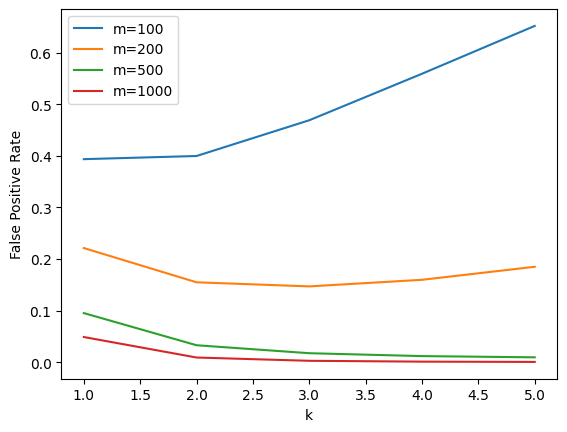

In [85]:
import matplotlib.pyplot as plt
import numpy as np

def false_positive_rate(m, k, n):
    return (1 - np.exp(-k * n / m)) ** k

# Пример анализа
m_values = [100, 200, 500, 1000]
k_values = [1, 2, 3, 4, 5]
n = 50  # Количество элементов

for m in m_values:
    rates = []
    for k in k_values:
        rates.append(false_positive_rate(m, k, n))
    plt.plot(k_values, rates, label=f'm={m}')

plt.xlabel('k')
plt.ylabel('False Positive Rate')
plt.legend()
plt.show()

In [86]:
def union(bloom1, bloom2):
    result = BloomFilter(bloom1.m, bloom1.k)
    result.bit_array = [a | b for a, b in zip(bloom1.bit_array, bloom2.bit_array)]
    return result

def intersection(bloom1, bloom2):
    result = BloomFilter(bloom1.m, bloom1.k)
    result.bit_array = [a & b for a, b in zip(bloom1.bit_array, bloom2.bit_array)]
    return result